# 기온 예측 문제

> 지금까지 다룬 시퀀스 데이터는 IMDB데이터 셋이나 로이터 데이터셋처럼 텍스트 데이터였다. 시퀀스 데이터는 이런 언어처리 분야뿐만 아니라 훨씬 많은 문제에서 등장한다. 이 모든 예제는 날씨 시계열 데이터셋을 사용한다. 이 데이터는 독일 예나(jena)시에 있는 막스 플랑크 생물지구화학 연구소의 지상 관측소에서 수집한 것이다.

> 이 데이터 셋에는 수년간에 걸쳐(기온, 기압, 습도, 풍향 등) 14개의 관측치가 10분마다 기록되어 있다. 원본 데이터는 2003년 부터 기록되어있지만 이 예제에서는 2009~2016년 사이의 데이터만 사용한다.

### 예나의 날씨 데이터셋 조사하기

In [1]:
import os

data_dir = './datasets/jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

f = open(fname)
data = f.read()
f.close()

In [2]:
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(header)
print(len(lines))
# 줄마다 하나의 타임스텝이고 날짜와 14개의 날씨 정보가 레코드이다.

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']
420451


In [3]:
# 데이터 전체를 넘파이 배열로 바꾸기(파싱)

import numpy as np

float_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]]
    float_data[i, :] = values

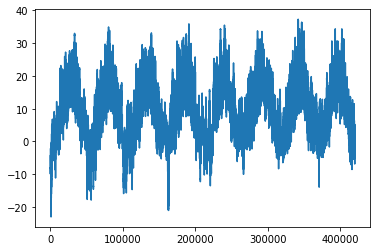

In [4]:
# 시계열 온도 그래프 그리기

from matplotlib import pyplot as plt

temp = float_data[:, 1] # 온도, (섭씨)
plt.plot(range(len(temp)), temp)